In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [5]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 149406 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# 왜 평균절대편차 대신 표준편차를 쓸까? 왜 중앙값이 아니라 평균인가?

분산: 평균과 각 값의 차이를 제곱한 값들의 평균
- 제평평제: 제곱의 평균 - 평균의 제곱

In [6]:
a = [1,2,3]
mean_a=sum(a)/3

def var_a(any_num,a):
  sum_list =[]
  for num in a:
    input_n = (num-any_num)**2 
    sum_list.append(input_n)
  
  return sum(sum_list)/len(a)

In [7]:
x_list =[]
y_list =[]
for num in range(-5,11):
  x_list.append(num)
  y_list.append(var_a(num,a))

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


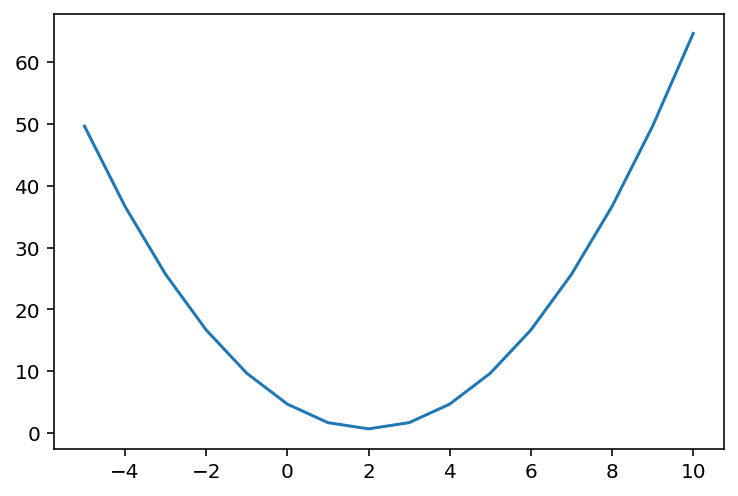

In [8]:
plt.plot(x_list,y_list)

평균값 대신에 '-5'부터 '10'까지 숫자를 바꿔가며 분산 공식에 대입해본 결과, 평균값인 '2'를 넣었 을 때, 분산이 가장 낮게 나타난다.

평균을 특정한 관찰값들의 대푯값이라고 생각하면, 분산은 대푯값으로부터 각 관측값들이 얼마나 넓게 퍼져있는지를 정량화한 값이라고 생각하면 좋다.

결국 대표값은 분산을 최소로하는 것으로 설정하는 것이 자연스러워 보인다.

하지만, 관측값들이 얼마나 퍼져있는지를 정량화하는 것은 분산말고, 평균절대편차라는 것도 있다.

In [9]:
a = [1,2,3,4,5]
mean_a=sum(a)/5

def var_a(any_num,a):
  sum_list =[]
  for num in a:
    input_n = abs(num-any_num) # 절대 편차 적용
    sum_list.append(input_n)
  
  return sum(sum_list)/len(a)

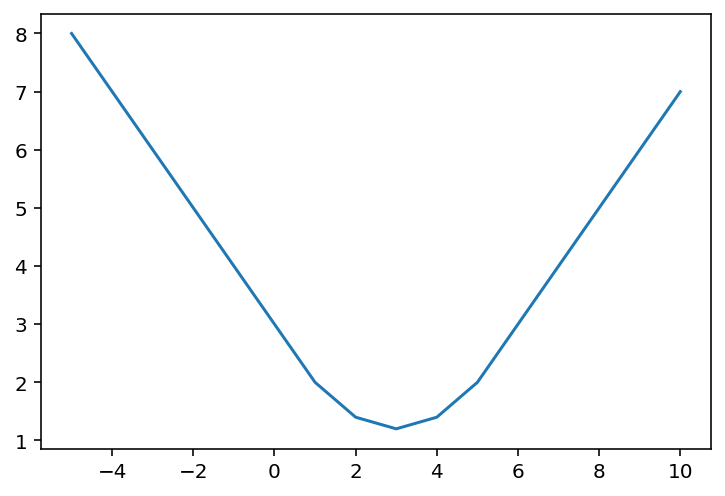

In [10]:
x_list =[]
y_list =[]
for num in range(-5,11):
  x_list.append(num)
  y_list.append(var_a(num,a))

plt.plot(x_list,y_list)

평균절대편차를 가지고 주어진 값들이 얼마나 퍼져 있는지를 측정할 떄, 대푯값을 중앙값으로 쓰는 것이 바람직함.

---
**그렇다면 왜 평균절대편차 대신에 분산을 사용하는 것일까??**

- 최대 가능도 방법(최대 우도 방법) : 모수를 추정함에 있어, 주어진 값이 나올 확률이 가장 큰 모수를 사용하는 것

정규분포의 확률분포 값을 f(x) 로 나타내면, 확률밀도는 f(x1) f(x2)f(x3) f(x4) ... 로 나타내고, 이를 최대로 하는 μ 와 σ 를 구하기 위해서는 f(x1) f(x2)f(x3) f(x4) ... 이를 먼저 구해야함.

f(x1) f(x2)f(x3) f(x4) ...를 전개하면 **exp(-x)**로 나타난다.

---

결과적으로 정균분포에서는 분산을 최소화하는 평균이 최대 우도 추정치이고, 라플라스 분포(이중지수분포)에서는 평균절대편차를 최소화하는 중앙값이 최대 우도 추정치이다. 